## This project is to look at album data for AC/DC and show what albums are most popular and the ones that are least popular
### this data is from https://www.kaggle.com/datasets/thebumpkin/168-acdc-album-tracks-with-spotify-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Loading CSV Dataset

In [2]:
with zipfile.ZipFile('archive.zip') as z:
    with z.open('ACDCAlbumTracks.csv') as f:
        df = pd.read_csv(f) 
        

#  Show top five songs in set

In [10]:


df.head()  # View the first few rows


,Track,Album,Year,Duration,Popularity,Decade
0,Can I Sit Next to You Girl,High Voltage,1975,251373,51,1970
1,High Voltage,High Voltage,1975,254200,58,1970
2,It's a Long Way to the Top (If You Wanna Rock ...,High Voltage,1975,301227,72,1970
3,Little Lover,High Voltage,1975,338307,43,1970
4,Live Wire,High Voltage,1975,348600,54,1970


# Columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             168 non-null    object 
 1   Album             168 non-null    object 
 2   Year              168 non-null    int64  
 3   Duration          168 non-null    int64  
 4   Time_Signature    168 non-null    int64  
 5   Danceability      168 non-null    float64
 6   Energy            168 non-null    float64
 7   Key               168 non-null    int64  
 8   Loudness          168 non-null    float64
 9   Mode              168 non-null    int64  
 10  Speechiness       168 non-null    float64
 11  Acousticness      168 non-null    float64
 12  Instrumentalness  168 non-null    float64
 13  Liveness          168 non-null    float64
 14  Valence           168 non-null    float64
 15  Tempo             168 non-null    float64
 16  Popularity        168 non-null    int64  
dt

# show statistical summaries

In [5]:
df.describe()  # Get statistical summaries

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,1990.928571,244648.988095,3.988095,0.498661,0.818161,5.916667,-4.696768,0.886905,0.057826,0.027387,0.153815,0.185105,0.539056,124.283476,46.077381
std,14.176632,49588.757337,0.154303,0.106125,0.120796,3.533275,0.975133,0.317656,0.037610,0.067775,0.245223,0.149406,0.178470,25.332091,12.313761
min,1975.000000,154507.000000,3.000000,0.179000,0.388000,0.000000,-9.511000,0.000000,0.024600,0.000002,0.000000,0.035900,0.078400,79.351000,29.000000
25%,1979.000000,210193.250000,4.000000,0.442750,0.740750,2.000000,-5.265250,1.000000,0.034600,0.000236,0.001567,0.084275,0.415750,106.754000,37.000000
50%,1985.000000,236793.500000,4.000000,0.501500,0.843000,7.000000,-4.560500,1.000000,0.046250,0.001990,0.016400,0.133000,0.537500,122.033500,42.000000
75%,2000.000000,267213.250000,4.000000,0.570500,0.906000,9.000000,-4.050750,1.000000,0.063250,0.019550,0.195500,0.233250,0.669000,133.867250,53.000000
max,2020.000000,414027.000000,5.000000,0.754000,0.995000,11.000000,-2.356000,1.000000,0.302000,0.514000,0.889000,0.884000,0.931000,202.798000,86.000000


## Drop unwanted data
## all but 4 columns ince thois were the main ones needed for analysis

In [6]:
df.drop(['Time_Signature', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',  'Acousticness',  'Instrumentalness', 'Liveness', 'Valence', 'Tempo'], axis=1, inplace=True)        



# show cleaned data
### showing the remaining columns after dropping unwanted data.
### there was nothing to clean from cells.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Track       168 non-null    object
 1   Album       168 non-null    object
 2   Year        168 non-null    int64 
 3   Duration    168 non-null    int64 
 4   Popularity  168 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB


# add new coumn called decade
###  This new column coulds be used to show what years were the best

In [8]:
df['Decade'] = (df['Year'] // 10) * 10

print(df)

                                                 Track         Album  Year  \
0                           Can I Sit Next to You Girl  High Voltage  1975   
1                                         High Voltage  High Voltage  1975   
2    It's a Long Way to the Top (If You Wanna Rock ...  High Voltage  1975   
3                                         Little Lover  High Voltage  1975   
4                                            Live Wire  High Voltage  1975   
..                                                 ...           ...   ...   
163                                   Shot In The Dark      POWER UP  2020   
164                                       Systems Down      POWER UP  2020   
165                          Through The Mists Of Time      POWER UP  2020   
166                                    Wild Reputation      POWER UP  2020   
167                                      Witch's Spell      POWER UP  2020   

     Duration  Popularity  Decade  
0      251373          51  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Track       168 non-null    object
 1   Album       168 non-null    object
 2   Year        168 non-null    int64 
 3   Duration    168 non-null    int64 
 4   Popularity  168 non-null    int64 
 5   Decade      168 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 8.0+ KB


# Chart by popularity

ValueError: too many values to unpack (expected 2)

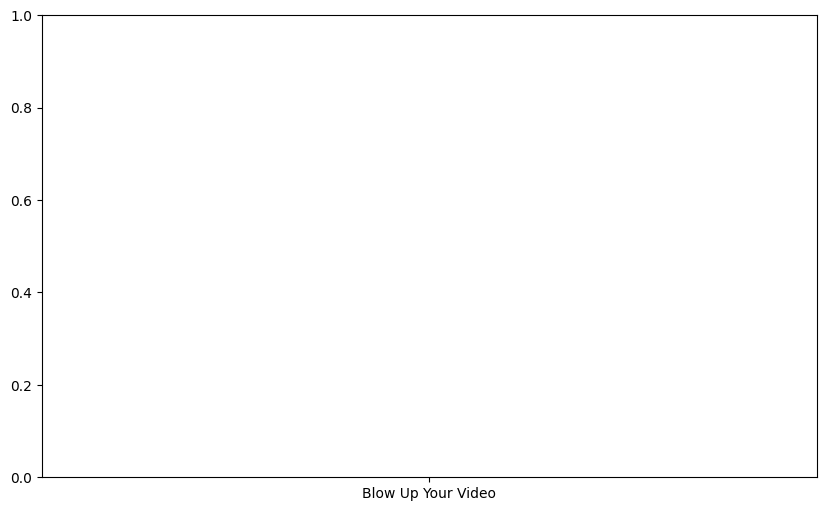

In [15]:
# popularity of each album
album_popularity = df.groupby('Album')['Popularity'].mean().sort_values()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.broken_barh(album_popularity.index, album_popularity.values, color='yellow')

# Set chart title and labels
plt.title('Popularity of AC/DC Albums')
plt.xlabel('Average Popularity')
plt.ylabel('Album')

# Display the plot
plt.show()

### This is just a sample of the data analysis you can do with a good dataset. 
### My findings are that the group AC\DC have had some good albums  and some not so good albums in their carreer